In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir("/content/drive/My Drive/ML/data/Dataset/")

In [4]:
df=pd.read_csv("EV Stats-1.csv")
df.head(10)

,Sl. No,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
0,1,Andhra Pradesh,431.0,692.0,4689.0,0,0.0,3680.0,0.0,9492.0
1,2,Assam,463.0,138.0,1006.0,0,117.0,151.0,0.0,1875.0
2,3,Bihar,252.0,430.0,2148.0,6,64.0,271.0,0.0,3171.0
3,4,Chhattisgarh,613.0,382.0,2078.0,58,106.0,997.0,0.0,4234.0
4,5,Delhi,1395.0,251.0,5018.0,0,1.0,12695.0,21.0,19381.0
5,6,Goa,0.0,0.0,0.0,0,0.0,513.0,1.0,514.0
6,7,Gujarat,7182.0,217.0,8476.0,0,4.0,15388.0,0.0,31267.0
7,8,Haryana,3162.0,1504.0,13908.0,113,24.0,4878.0,0.0,23589.0
8,9,Himachal Pradesh,0.0,0.0,0.0,0,0.0,98.0,0.0,98.0
9,10,Jammu & Kashmir,2.0,76.0,152.0,0,0.0,208.0,0.0,438.0


In [6]:
df.shape

(35, 10)

In [7]:
df.isnull().sum()

Sl. No                                                                1
State                                                                 1
Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules    4
Two Wheelers (Category L2 (CMVR))                                     4
Two Wheelers (Max power not exceeding 250 Watts)                      4
Three Wheelers (Category L5 slow speed as per CMVR)                   1
Three Wheelers (Category L5 as per CMVR)                              4
Passenger Cars (Category M1 as per CMVR)                              4
Buses                                                                 4
Total in state                                                        4
dtype: int64

In [10]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('EV Stats-1.csv')

# Display the DataFrame with missing values
print("Original DataFrame:\n", df)

# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['number']).columns

# Create a SimpleImputer instance with desired strategy, excluding non-numeric columns
imputer = SimpleImputer(strategy='mean')  # Other strategies: 'median', 'most_frequent', 'constant'

# Fit the imputer to the dataset, excluding non-numeric columns
imputer.fit(df.drop(columns=non_numeric_columns))

# Transform the dataset by imputing missing values
df_imputed = pd.DataFrame(imputer.transform(df.drop(columns=non_numeric_columns)), columns=df.drop(columns=non_numeric_columns).columns)

# Concatenate non-numeric columns back to the imputed DataFrame
df_imputed = pd.concat([df[non_numeric_columns], df_imputed], axis=1)

# Display the DataFrame after imputation
print("\nImputed DataFrame:\n", df_imputed)

# Save the imputed DataFrame to a new CSV file
df_imputed.to_csv('imputed_dataset.csv', index=False)


Original DataFrame:
         Sl. No                                              State  \
0            1                                     Andhra Pradesh   
1            2                                              Assam   
2            3                                              Bihar   
3            4                                       Chhattisgarh   
4            5                                              Delhi   
5            6                                                Goa   
6            7                                            Gujarat   
7            8                                            Haryana   
8            9                                   Himachal Pradesh   
9           10                                    Jammu & Kashmir   
10          11                                          Jharkhand   
11          12                                          Karnataka   
12          13                                             Kerala   
13          1

In [12]:
df.describe()

,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,1777.354839,907.677419,7260.516129,46.451613,6811.032258,1.741935,16829.870968
std,5000.160994,2518.917378,20008.445495,131.491150,18941.726543,6.016465,46327.212405
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,6.000000
25%,22.000000,19.000000,94.000000,0.000000,236.500000,0.000000,665.000000
50%,463.000000,228.000000,2148.000000,1.000000,997.000000,0.000000,4234.000000
75%,1089.500000,767.500000,6639.000000,37.500000,5487.500000,0.000000,14951.500000
max,27549.000000,14069.000000,112538.000000,720.000000,105571.000000,27.000000,260863.000000


<ipython-input-13-36d984d66f3b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


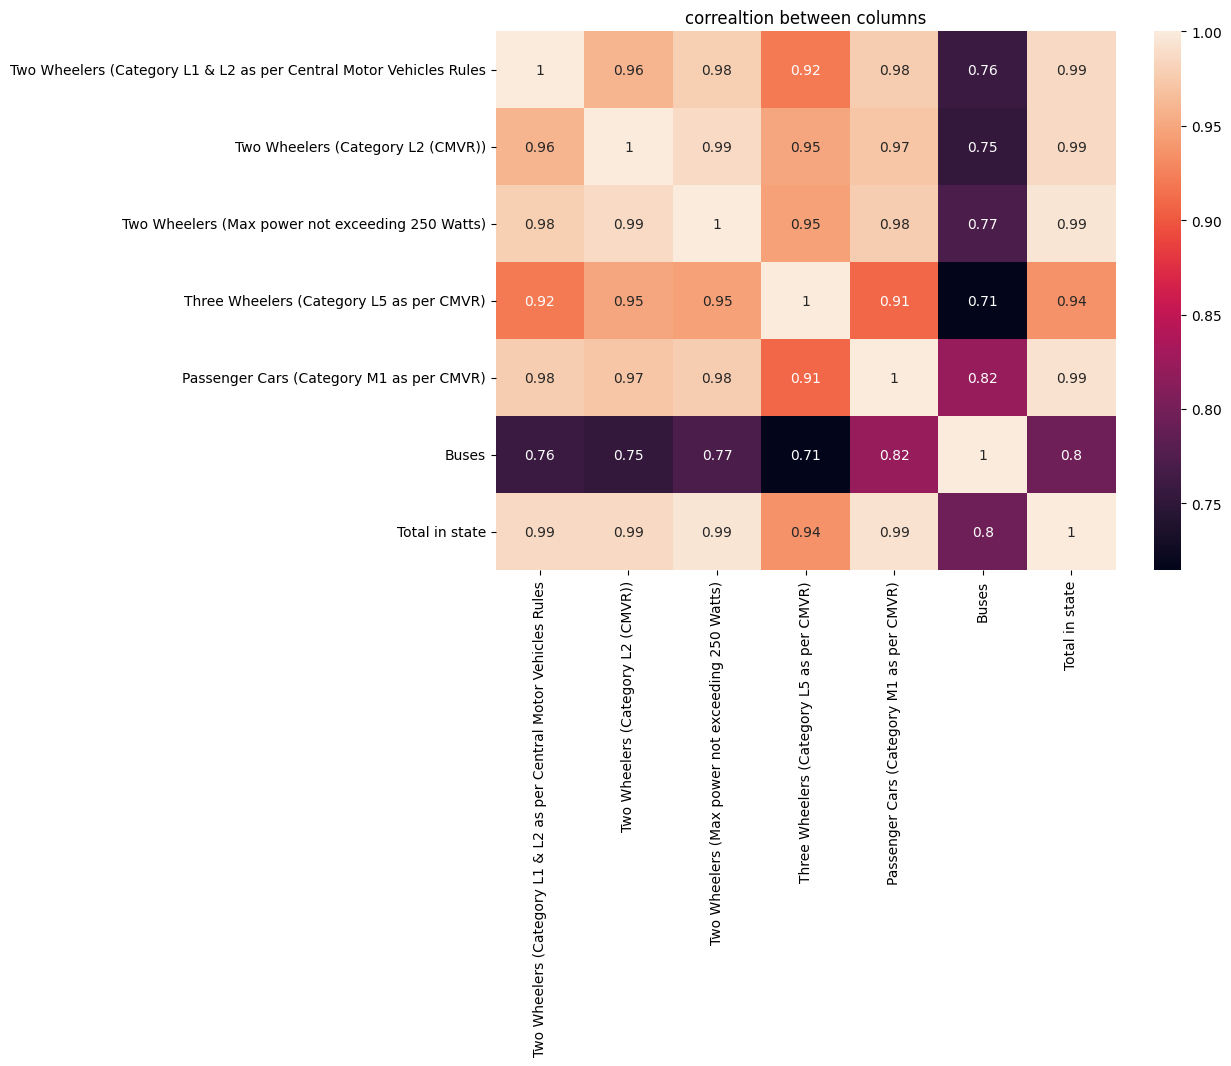

In [13]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)
plt.title('correaltion between columns')
plt.show()

In [18]:
df = df.drop('Sl. No',axis=1)
df.columns

Index(['State',
       'Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules',
       'Two Wheelers (Category L2 (CMVR))',
       'Two Wheelers (Max power not exceeding 250 Watts)',
       'Three Wheelers (Category L5 slow speed as per CMVR)',
       'Three Wheelers (Category L5 as per CMVR)',
       'Passenger Cars (Category M1 as per CMVR)', 'Buses', 'Total in state'],
      dtype='object')

In [19]:
df = df.drop('State',axis=1)
df.columns

Index(['Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules',
       'Two Wheelers (Category L2 (CMVR))',
       'Two Wheelers (Max power not exceeding 250 Watts)',
       'Three Wheelers (Category L5 slow speed as per CMVR)',
       'Three Wheelers (Category L5 as per CMVR)',
       'Passenger Cars (Category M1 as per CMVR)', 'Buses', 'Total in state'],
      dtype='object')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

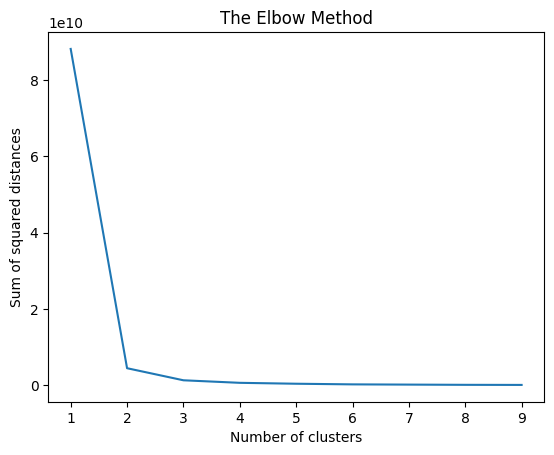

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

# Select only numeric columns from the DataFrame
df_numeric = df.select_dtypes(include=[np.number])

# Impute missing values in the numeric DataFrame
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

# Apply KMeans clustering to the imputed numeric DataFrame
wss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_imputed)
    wss.append(kmeans.inertia_)

# Plotting the elbow method
plt.plot(range(1, 10), wss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

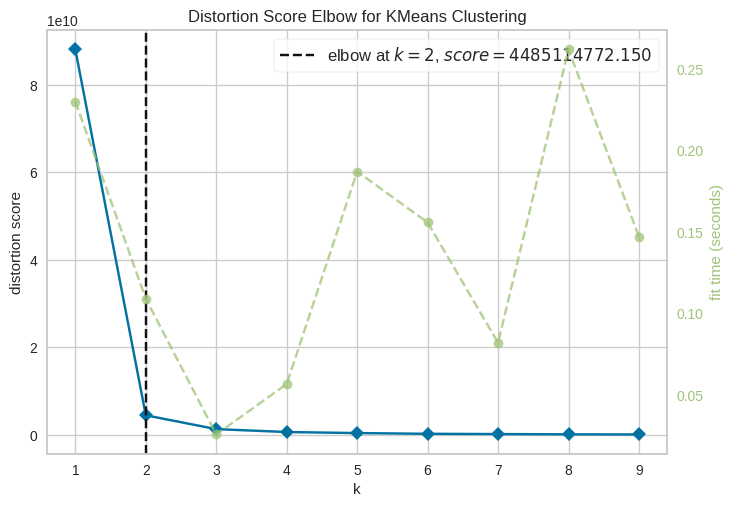

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import pandas as pd

# Assuming 'df' is your DataFrame containing both numeric and non-numeric columns
# Select only numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Impute missing values in the numeric DataFrame
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

# Create a KMeans object
model = KMeans()

# Create the KElbowVisualizer
visualizer = KElbowVisualizer(model, k=(1, 10), timing=False)

# Fit the visualizer to the imputed numeric data
visualizer.fit(df_imputed)

# Show the visualizer
visualizer.show()


In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

# Assuming 'df' is your DataFrame
# Select only numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Check for missing values and handle them if needed
# For example, you can fill missing values with the mean of each column
df_numeric = df_numeric.fillna(df_numeric.mean())

# Perform clustering
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, max_iter=100)
    kmeans.fit(df_numeric)
    score = silhouette_score(df_numeric, kmeans.labels_)
    print("For cluster: {}, the silhouette score is: {}".format(i, score))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For cluster: 2, the silhouette score is: 0.9272520807580799
For cluster: 3, the silhouette score is: 0.6167512208770048
For cluster: 4, the silhouette score is: 0.6114978635414262


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For cluster: 5, the silhouette score is: 0.6294070374253625
For cluster: 6, the silhouette score is: 0.5929421759847183


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For cluster: 7, the silhouette score is: 0.5525718721270149
For cluster: 8, the silhouette score is: 0.5581761992950224


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For cluster: 9, the silhouette score is: 0.5535597634331331


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

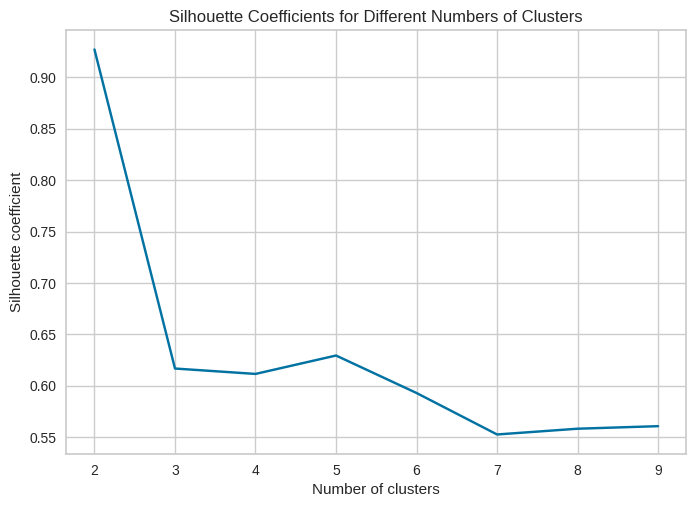

In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame
# Select only numeric columns
df_numeric = df.select_dtypes(include=np.number)

# Handle missing values if needed (filling with mean in this example)
df_numeric = df_numeric.fillna(df_numeric.mean())

# Calculate silhouette scores
silhouette_coefficients = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, max_iter=100)
    kmeans.fit(df_numeric)
    score = silhouette_score(df_numeric, kmeans.labels_)
    silhouette_coefficients.append(score)

# Plot silhouette coefficients
plt.plot(range(2, 10), silhouette_coefficients)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette coefficient")
plt.title("Silhouette Coefficients for Different Numbers of Clusters")
plt.show()

In [26]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame
# Select only numeric columns
df_numeric = df.select_dtypes(include=np.number)

# Handle missing values if needed (filling with mean in this example)
df_numeric = df_numeric.fillna(df_numeric.mean())

# Standardize the data
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_numeric)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(df_standardized)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


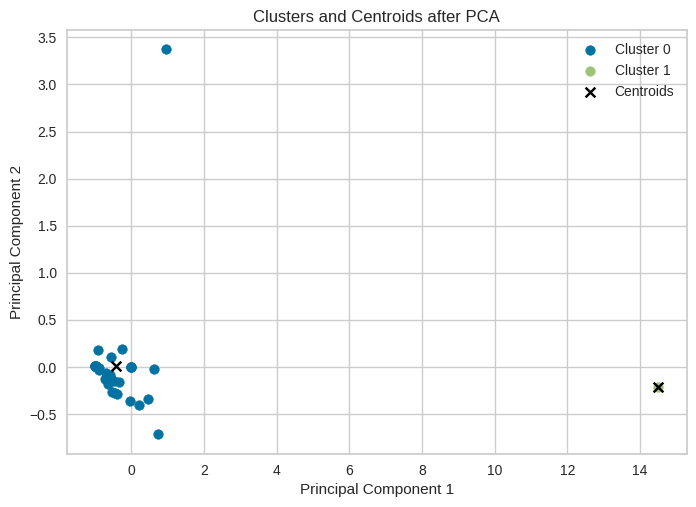

In [27]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'X_pca' is your data after PCA transformation
# Perform KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X_pca)

# Plot data points with cluster labels
unique_labels = set(labels)
for i in unique_labels:
    plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], label=f'Cluster {i}')

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='black', label='Centroids')

plt.legend()
plt.title('Clusters and Centroids after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()